# NOTE
Unfortunately, the math is still off. I am aware of the naive method of going through the multinomial distribution and summing probabilities, but I am aiming for an efficient (read: polynomial-time) algorithm so that the answers could actually be computed. Unfortunately, though counting the number of satisfactory configurations and total number of configurations is fairly simple, determining the weight for each configuration is more difficult (as they depend on the number of elements in each bin).

Still thinking...

## The problem
Say *n* items are placed into one of *d* containers independently and according to a uniform probability distribution (i.e., the probability that any item is placed into a specific container is $\frac{1}{d}$). What value of n is needed so that the probability that at least *k* containers hold at least one item is at least *p*?

(Thought of while being unable to sleep at ~2 AM a day or two ago.)

## The math

We have that

$$p = \frac{G\text{, the total number of good states}}{T\text{, the total number of possible states}}$$


It is important not to remove the degeneracy of configurations in this problem. In a sense, the degeneracy makes more probable configurations have more weight in determining the final probability. (As a toy example, if 990 mutually indistinguishable configurations satisfied a condition and 10 mutually distinct configurations did not satisfy that condition, we would say the probability of finding the system in a configuration that satisfies the condition to be $\frac{990}{990+10} = \frac{99}{100}$, not $\frac{1}{1+10} = \frac{1}{11}$.)

With this warning in mind, $T = T(n;k,d)$ is simply calculated as $d^n$.

$G = G(n;k,d)$ is slightly more complicated. The search for a closed-form expression for $G$ (or $p$) will easily swallow time and incite headaches. [I've probably tried to do so for a day's worth of man-hours.] Instead, we calculate $G$ using dynamic programming. That is:

$$ $$

// write formula, explain in words

// explain probability formulation (of dividing recurrence relation by d)



Worth noting is the conditional probability of a specific placement of items following a multinomial distribution.
If we have $n$ total items, then
$$ MN(x_1, x_2, \cdots, x_{d-1} \mid x_d = m; n) = MN(x_1, x_2, \cdots, x_{d-1}; n - m) \times Pr[m\text{ items in bin } d]$$
$$ = MN(x_1, x_2, \cdots, x_{d-1}; n - m) \times \left(\frac{1}{d}\right)^m$$


In [6]:
from functools import partial # to later simplify p

In [27]:
def permute(n,k):
    prod = 1
    for x in range(k+1, n+1):
        prod *= x
    return prod

def init_val(d,k):
    prod = 1
    for x in range(k):
        prod *= ((d-x)/d)
    return prod

In [28]:
def solve_birthday_problem(k, d, p, n_max = 100000):
    """
    Returns the minimum value of n that satisfies the 'birthday variant' given the supplied parameters,
    unless the true answer n > n_max, in which case, returns p(n_max,k,d)
    """

    # We do not know which value n will satisfy our desired threshold probability
    # so creating a fixed-size n-by-k array of solutions does not make sense
    # It would also be nice to cap our runtime in case n is a huge number
    # for memory concerns
    # Hence, we implement DP using memoization

    print("We are solving for k={0}, d={1}, p={2}".format(k,d,p))
    
    nk2p = {} # keys = (n,k); values = p; we'll also put the value of d in for completeness

    #nkd2p = {}

    def prob(n, k, d):
        if (n,k) in nk2p:
            return nk2p[(n,k)]
        else:
            if k <= 1 and n >= 0:
                nk2p[(n,k)] = 1
            elif n < k:
                nk2p[(n,k)] = 0
            elif n == k:
                nk2p[(n,k)] = init_val(d,k)
            else:
                nk2p[(n,k)] = prob(n-1, k, d) + (1 - (k-1)/d) * prob(n-1,k-1,d)
        return nk2p[(n,k)]
    
    # for "labeling" purposes
    nk2p['d'] = d
    
#     make a partial (quicker(?))
#     error when called recursively (?)
#     prob = partial(prob, d = d)
    
    for x in range(n_max+1):
        if prob(x, k, d) >= p:
            print("The answer is n = {0}. p(n, k, d) = {1}".format(x, prob(x,k,d)))
            return x
    # wasn't in range...
    print("True answer is larger than n_max = {0}. p(n_max, k, d)={1}".format(n_max,prob(n_max,k,d)))
    


In [37]:
# for testing purposes
nk2p = {}
def prob(n, k, d):
    if (n,k) in nk2p:
        return nk2p[(n,k)]
    else:
        if k <= 1 and n >= 0:
            nk2p[(n,k)] = 1
        elif n < k:
            nk2p[(n,k)] = 0
        elif n == k:
            nk2p[(n,k)] = init_val(d,k)
        else:
            nk2p[(n,k)] = prob(n-1, k, d) + (1 - (k-1)/d) * prob(n-1,k-1,d)
    return nk2p[(n,k)]

In [49]:
def permute(n,k):
    prod = 1
    for x in range(k+1, n+1):
        prod *= x
    return prod

In [73]:
# for testing purposes
nk2g = {}
def g(n, k, d):
    c = (n,k)
    if c in nk2g:
        return nk2g[c]
    else:
        if k == 1:
            nk2g[c] = d**(1-n) #can choose any one bin, then rest must be in bin
        elif n < k:
            nk2g[c] = 0 # not enough items
        elif n == k:
            nk2g[c] =(permute(d,k) * (k**(n-k))) / d**n #any k bins, rest of items can go wherever in those k bins
        else:
            nk2g[c] = (k * g(n-1, k, d) + (d - (k-1)) * g(n-1, k-1, d)) / d
    return nk2g[c]

def G(n,k,d):
    return sum(g(n, i, d) for i in range(k, d+1))

# def pr(n,k,d):
#     return G(n,k,d) / d**n


In [74]:
k, d, p = 4, 5, 0.5
G(100, k, d)

1.2627200000000007

In [75]:
def prob(n,k,d):
    prod = 1
    for i in range(k):
        prod *= ((n-i)/(n-i+d-1))
    return prod


In [87]:
def factorial(n):
    prod = 1
    for i in range(1,n+1):
        prod *= i
    return prod

In [88]:
k, d, p = 2, 2, 0.5
n = 2
print(prob(n, k, d))
print(factorial(n)/(d**n))

0.3333333333333333
0.5


In [21]:
# try-except-finally method for prob
# too large a recursive whole it seems...
def prob_tef(n, k, d):
    try:
        return nk2p[(n,k)]
    except KeyError:
        if k <= 1 and n >= 0:
            nk2p[(n,k)] = 1
        elif n < k:
            nk2p[(n,k)] = 0
        elif n == k:
            nk2p[(n,k)] = d**(-k) * permute(d,k)
        else:
            nk2p[(n,k)] = prob(n-1, k, d) + (1 - (k-1)/d) * prob(n-1,k-1,d)
    finally:
        return nk2p[(n,k)]

In [29]:
k, d, p = 365, 365, 0.5

solve_birthday_problem(k,d,p)

We are solving for k=365, d=365, p=0.5
The answer is n = 563. p(n, k, d) = 1.2042725276996924


563

In [7]:
# collect (p,n) for p in [0.01, 0.99] with fixed d,k (365,365)
# update our guess for n intelligently

# n = 2000 # initial guess
k = 365 # want to cover 365 unique days
d = 365 # number of possible locations


def collect_pn(d,k):
    # first guess
    n = k
    pn_coords = []
    
    # sweep [0.001 - 0.01]
    for p in frange(0.001, 0.01, 0.001):
        n = solve_for_n(n,k,d,p)
        pn_coords.append((p,n))
    # sweep [0.01 - 0.99]
    for p in frange(0.01, 0.99, 0.01):
        n = solve_for_n(n,k,d,p)
        pn_coords.append((p,n))
    # sweep [0.99 - 0.999]
    for p in frange(0.99, 1, 0.001):
        n = solve_for_n(n,k,d,p)
        pn_coords.append((p,n))
    
#     for p in range(1, 100, 1):
#         p /= 100 # range from [0.01, 0.99] inclusive
#         n = solve_for_n(n, k, d, p)
#         pn_coords.append((p,n))
    
    return pn_coords
        
pn_coords = collect_pn(d,k)


In [8]:
ps, ns = [], []
for e in pn_coords:
    p,n = e
    ps.append(p)
    ns.append(n)

In [9]:
import matplotlib.pyplot as plt

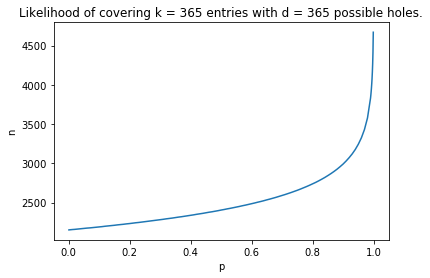

In [10]:
plt.plot(ps, ns)
plt.title("Likelihood of covering k = {0} entries with d = {1} possible holes.".format(k, d))
plt.xlabel('p')
plt.ylabel('n')
plt.show()

These results are pretty counterintuitive, but they just go to show how intuition and probability scenarios tend to clash. It may be interesting to see how *n* responds to variations in *d* and *k*.

### Disclaimer
There may be a mistake in the math or in the implementation of the numerical solver. For smaller values of p and n especially (p < 0.01), the solver fails to converge to significantly smaller than p. (The results of the solver may simply imply that the sharp uptick in probability occurs right at n = 2150, but this claim is dubious without further explanation.) We unfortunately cannot track the value in which the probability stops being negligible (say p > 0.0001) or the function's initial behavior through the method implemented above.

\- DK

In [17]:
import math

In [26]:
def factorial(n):
    prod = 1
    for x in range(1, n+1):
        prod *= x
    return prod

In [28]:
def g(n, k, d):
    return 1 - choose(d, k - 1) * (((k-1)/d))**n

In [29]:
n = 365
k = 365
d = 365

g(n,k,d)
# factorial(n)

OverflowError: int too large to convert to float

In [1]:
def choose(n,k):
    numer, denom = 1, 1
    for x in range(0, k):
        numer *= (n - x)
        denom *= (x+1)
    return numer // denom

In [ ]:
# for testing purposes
nk2g = {}
def g(N, K, d):
    nk2g = {}
    for n in range(N+1):
        for k in range(K+1):
            if N < K:
                nk2g[(n,k)] = 0
        elif n == k:
            nk2g[(n,k)] = k
        else:
            nk2g[(n,k)] = k * nk2g[(n-1, k)] + nk2g[(n-1, k)]          
    return nk2g[(N,K)]

In [29]:
def g(n, k, d):
    c = (n,k)
    if c in nk2g:
        return nk2g[c]
    else:
        if n <= 0 or k <= 0:
            return 0
        if n < k:
            return 0
#             nk2g[c] = 0 # not enough items
        elif n == k:
            return k
#             nk2g[c] = k
        else:
            nk2g[c] = k * g(n-1, k, d) + g(n-1, k-1, d)
    return nk2g[c]


def G(n, k, d):
    return sum(choose(d,i)*g(n,i,d) for i in range(k,d+1))

def p(n,k,d):
    return G(n,k,d) / (d**n)

In [33]:
n = 50
k = 2
d = 2

p(n,k,d)

0.7499999999999991

In [20]:
import sys
sys.setrecursionlimit(1000)